# ML Techniques Review Exercise: Housing Dataset

### Part 1: Data Exploration/Preparation
a) Load the dataset and explore the data: 
   - Display the first 5 rows
   - Count the number of rows
   - What are the data types of the columns?

In [1]:
#SOLUTION_START
import pandas as pd
df = pd.read_csv("../Datasets/housing.csv")
print(df.head())
print()
print(f"number of rows: {len(df)}")
print()
print(df.dtypes)
#SOLUTION_END

    Area  Rooms  YearBuilt  NeighborhoodRating  DistanceToCenter  \
0  155.3      2       2007                 5.0              7.46   
1  128.0      5       1986                 1.0              3.06   
2  139.6      4       2012                 1.0              1.52   
3  164.8      3       1954                 3.0              3.72   
4  157.4      4       1980                 4.0              4.74   

    BuildingType     Price  
0  Semi-detached  555257.0  
1      Apartment  428783.0  
2      Apartment  473082.0  
3      Apartment  573441.0  
4      Apartment  532484.0  

number of rows: 200

Area                  float64
Rooms                   int64
YearBuilt               int64
NeighborhoodRating    float64
DistanceToCenter      float64
BuildingType           object
Price                 float64
dtype: object



b) Set the ordinal variable 'NeighborhoodRating' to categorical type. It ranges from 1 (worst) to 5 (best).

In [80]:
#SOLUTION_START
df["NeighborhoodRating"] = df["NeighborhoodRating"].astype("category")
#SOLUTION_END

c) Count the number of missing values per column



In [81]:
#SOLUTION_START
print (df.count())
#SOLUTION_END

Area                  180
Rooms                 200
YearBuilt             200
NeighborhoodRating    180
DistanceToCenter      200
BuildingType          200
Price                 200
dtype: int64



d) Remove rows with missing values from the dataset, count the number of remaining rows.

In [82]:
#SOLUTION_START
df_clean = df.dropna()
print(len(df_clean))
print()
print(df_clean.count())
#SOLUTION_END

164

Area                  164
Rooms                 164
YearBuilt             164
NeighborhoodRating    164
DistanceToCenter      164
BuildingType          164
Price                 164
dtype: int64


### Part 2: Predicting 'Price'

Train a lineair regression model to predict 'Price' 
- Use default hyperparameters.
- Only use features that have a correlation with 'Price' that is higher then 0.4.
- Use 80% of the data to train the model (use random_state = 42)

a) Return the coefficients / intercept for the resulting lineair regression model

In [83]:
#SOLUTION_START
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#calculate correlation coefficients
correlation = df_clean.corr(numeric_only=True)
correlation["Price"].drop(['Price'])

#SOLUTION_END

Area                0.862108
Rooms               0.232136
YearBuilt          -0.121589
DistanceToCenter   -0.073234
Name: Price, dtype: float64

In [84]:
#SOLUTION_START
#Select target variable and features
X = df_clean[["Area"]]
y = df_clean["Price"]

#Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the linear regression model
lrm = LinearRegression()
lrm.fit(X_train, y_train)

print(lrm.intercept_)
print(lrm.coef_)

#SOLUTION_END

58432.12083158415
[3051.35600919]


b) Plot the regression line in a scatterplot

Text(0, 0.5, 'Price')

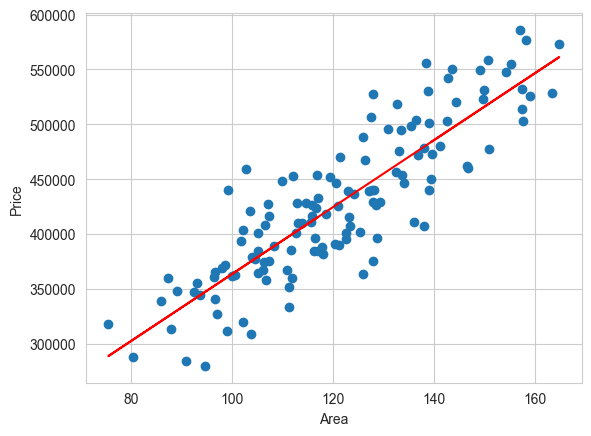

In [85]:
#SOLUTION_START
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_train, lrm.predict(X_train), color = 'red')
plt.xlabel('Area')
plt.ylabel('Price')
#SOLUTION_END

c) What are the resulting values for MSE, RMSE, MAE and MAPE?

In [86]:
#SOLUTION_START
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

#Make predictions on test data
y_pred = lrm.predict(X_test)

#Calculate error metrics on test data predictions
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
#SOLUTION_END

MSE: 1387783008.7166948
RMSE: 37252.95973096225
MAE: 30412.297553822737
MAPE: 0.07801833546428782


Now add all features except for 'BuildingType' to the model

d) Compare this model with the previous one, does it score better or worse? 

In [162]:
#SOLUTION_START
#Select target variable and features
X = df_clean.drop(['Price','BuildingType'], axis=1)
y = df_clean["Price"]

#Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the linear regression model
lrm2 = LinearRegression()
lrm2.fit(X_train, y_train)

#Make predictions on test data
y_pred = lrm2.predict(X_test)

#Calculate error metrics on test data predictions
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

#The scores of this model are slightly better (the errors have decreased)
#SOLUTION_END

MSE: 375994035.6266592
RMSE: 19390.565634520804
MAE: 15809.985718762626
MAPE: 0.03986561403779251


e) Now create a polynomial regression model to predict 'Price':
 - Use the same trainingsdata as from the previous exercise
  - Use gridsearch to find the optimal number of degrees (between 1 and 10, including 10) and whether to fit the intercept or not.

Print the best hyperparameters found and the corresponding R^2 score

In [168]:
#SOLUTION_START
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline
import numpy as np

#Define hyperparameter ranges
grid_param = {'polynomialfeatures__degree': np.arange(1, 11),             
              'linearregression__fit_intercept': [True, False]}

grid_search = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),grid_param, cv=6)

# Execute full grid search
grid_search.fit(X_train, y_train)

# Display best hyperparameter values and matching validation score
print(f'Best parameters : {grid_search.best_params_}')
print(f'Best score      : {grid_search.best_score_:.3f}')
#SOLUTION_END

Best parameters : {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 1}
Best score      : 0.926


Now train the polynomial regression model with the hyperparameters found in the previous section. 
- What is the R^2 score on the test data? 
- Also print the resulting error metrics (RMSE, MSE, MAE and MAPE). 
- Does this model score better than the previouse lineair models or worse?

In [166]:
#SOLUTION_START
#The optimal number of degrees is 1, which means that we are just going to do lineair regression. 
# We could therefore also look at the results from question d. 
# For demonstration, below the numbers are recalculated for the 'polynomial' regression model, but you will find that they are (almost) identical to those of question d. 
# The only thing we changed here is that we set the fit_intercept to 'False', whilst in question d it was 'True' by default.

#retrieve the best model
prm = grid_search.best_estimator_

#Alternative, manually filling in the best hyperparameters found and retraining the model with those:
'''prm = make_pipeline(PolynomialFeatures(degree=1),LinearRegression(fit_intercept=False))
prm.fit(X_train, y_train)'''

#Make predictions on test data 
y_pred = prm.predict(X_test)

#Calculate error metrics on test data predictions
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

#This model preforms the as good as the same as the linear regression model from question d. The only change we made was to set fit_intercept to 'False', resulting in a very small improvement.
#SOLUTION_END

MSE: 375994035.62665707
RMSE: 19390.56563452075
MAE: 15809.98571876259
MAPE: 0.03986561403779241


### Part 3: Predicting 'BuildingType'
Build a Decision Tree classifier to predict 'BuildingType'. Use all other columns (excluding Price) as input.
- Use again 80% of the data to train the model (use random_state = 42). 
- Limit the maximum tree depth to 3
- set 'criterion' to 'entropy'

a) Display the tree

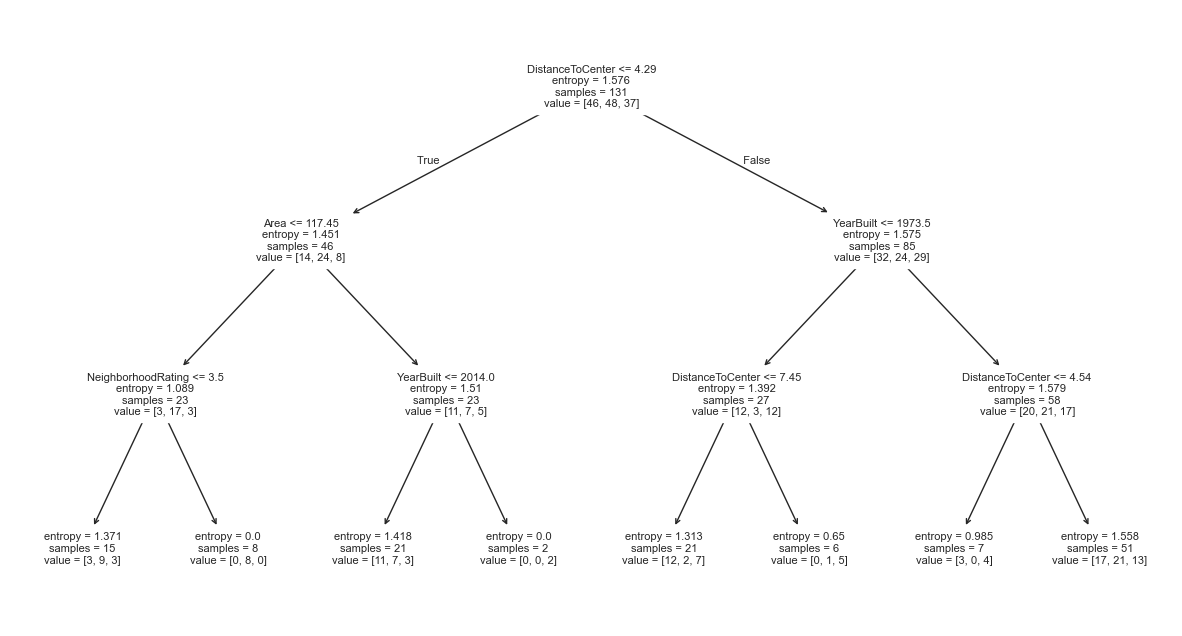

In [199]:
#SOLUTION_START
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Encode target
X = df_clean.drop(columns=["Price", "BuildingType"])
y = df_clean["BuildingType"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=3, criterion="entropy")
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 8))
_=plot_tree(clf, feature_names=X.columns)
#SOLUTION_END

b) Which variable has the highest information gain?


In [200]:
#SOLUTION_START
#By looking at the tree, we see it is first split by 'DistanceToCenter' column, meaning this variable has the highest information gain.
#SOLUTION_END

You look at a new house, with:
- Area : 76
- Rooms = 5
- YearBuilt = 1876
- NeighborhoodRating = 4.0
- DistanceToCenter = 3.9

c) What building type does the tree predict for this new house? 

In [201]:
#SOLUTION_START
#If we use the tree to make a prediction for a new house with 'Area' = 76, we come in a leaf node with values [0,0,2]. This means that the predicted value will be the third class from the 'building type' variable, we can find that class as follows:
print(clf.classes_)
#From the resulting array of classes we can conclude that the prediction for a house with Area = 76 will be 'Semi-detached'

#Alternatively we could do a prediction by creating a dataframe containing the new house, and predicting the values for that:
x_newhouse = pd.DataFrame({'Area':[76],'Rooms': [5],'YearBuilt':[1876],'NeighborhoodRating': [4.0], 'DistanceToCenter':[3.9]})
y_newhouse = clf.predict(x_newhouse)
print(y_newhouse)
#SOLUTION_END

['Apartment' 'Detached' 'Semi-detached']
['Detached']


d) What percentage of the test data is predicted correctly by this model? 

In [202]:
#SOLUTION_START
#Make predictions on the test data
y_pred = clf.predict(X_test)
#Accuracy will return how many of the predicted values were correct:
print("Accuracy:", accuracy_score(y_test, y_pred))
#SOLUTION_END

Accuracy: 0.2727272727272727



Now use a random forest to predict 'BuildingType'. Use all other columns (excluding Price) as input.
- Use again 80% of the data to train the model.
- Use random_state = 42

Use Gridsearch with 5 fold cross-validation to find the optimal values for the following hyperparameters:
- Number of estimators, check the for the range of 1 to 10, including 10
- Maximum tree depth, check the for the range of 1 to 8, including 8
- Criterion ('entropy' or 'gini')

Leave the rest on default

Display the accuracy of the resulting model

e) Does this model score better or worse than the tree, if you compare the accuracy? 

In [203]:
#SOLUTION_START
from sklearn.ensemble import RandomForestClassifier

#Define hyperparameter ranges
grid_param = {'n_estimators': np.arange(1, 11),               
              'max_depth': np.arange(1, 9),
              'criterion': ['entropy','gini']}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), grid_param, cv=5)
grid_search.fit(X_train, y_train)

#Make predictions on the test data
y_pred = clf.predict(X_test)
#Print accuracy:
print("Accuracy:", accuracy_score(y_test, y_pred))

#It scores the same as the tree model. 
#SOLUTION_END

Accuracy: 0.2727272727272727


### Part 4: Clustering

Use K-Means clustering to find 4 clusters, based on house 'Price' and 'Area'
- Use random_state=42
- Make sure you normalize the data first.

a) How many rows are in each resulting cluster? 


In [92]:
#SOLUTION_START
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Normalize the dataset
scaler = StandardScaler()
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=42))
#SOLUTION_END

In [93]:
#SOLUTION_START
df_clusters = df_clean.copy()
X = df_clusters[['Area', 'Price']]
df_clusters['Cluster'] = kmeans.fit_predict(X[['Area', 'Price']])
df_clusters.head()
df_clusters['Cluster'].value_counts()
#SOLUTION_END

Cluster
0    61
3    48
2    31
1    24
Name: count, dtype: int64

b) What are the average 'Price' and 'Area' per cluster? 

In [108]:
#SOLUTION_START
gem = df_clusters.groupby('Cluster').agg({ 'Price':'mean', 'Area':'mean'})
print(gem)

#These values are identical to the cluster centers, so alternatively you could just look for those with the following code:
'''kmeans2 = kmeans.named_steps['kmeans']
centers = kmeans.named_steps['standardscaler'].inverse_transform(kmeans2.cluster_centers_)
print(centers)'''
#SOLUTION_END

                 Price        Area
Cluster                           
0        402165.688525  112.618033
1        537099.750000  152.058333
2        331597.387097   93.832258
3        460684.500000  132.162500


"kmeans2 = kmeans.named_steps['kmeans']\ncenters = kmeans.named_steps['standardscaler'].inverse_transform(kmeans2.cluster_centers_)\nprint(centers)"

c) Create a scatterplot to visualize the clusters:
- Place 'Area' on the x-axis and 'Price' on the y-Axis
- Give each cluster a different color
- Also plot the centroids (cluster centers)

Text(0, 0.5, 'Price')

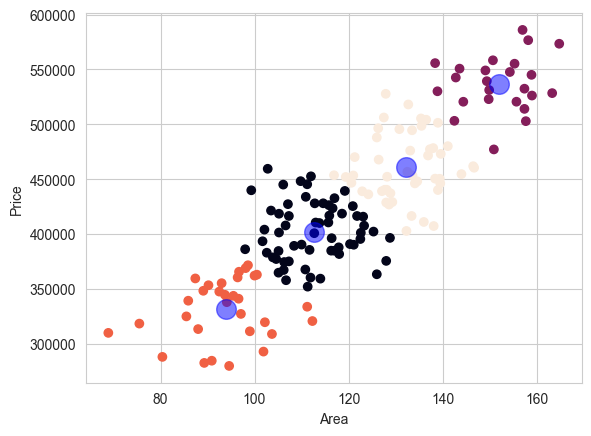

In [114]:
#SOLUTION_START
#plotting the clusters
plt.scatter(df_clusters['Area'], df_clusters['Price'], c=df_clusters['Cluster'])

#retrieving the centroids
kmeans2 = kmeans.named_steps['kmeans']
centers = kmeans.named_steps['standardscaler'].inverse_transform(kmeans2.cluster_centers_)
#plotting the centroids
plt.scatter(centers[:,0], centers[:,1], c='blue', alpha=0.5, s=200)

plt.xlabel("Area")
plt.ylabel("Price")
#SOLUTION_END